In [28]:
import pandas as pd

In [29]:
df_raw = pd.read_excel(
    "../data/sh_emae_mensual_base2004.xls",
    header=None
)


In [30]:
df = df_raw.iloc[4:, [0, 1, 2]]
df.columns = ["year", "month", "emae"]

df.head(15)


,year,month,emae
4,2004,Enero,92.627506
5,NaN,Febrero,90.186179
6,NaN,Marzo,101.883298
7,NaN,Abril,102.56743
8,NaN,Mayo,109.877504
9,NaN,Junio,105.662406
10,NaN,Julio,101.106997
11,NaN,Agosto,98.355737
12,NaN,Septiembre,98.086375
13,NaN,Octubre,97.835666


In [31]:
df["month"] = df["month"].replace("Nan", pd.NA)
df = df.dropna(subset=["month"])


In [32]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["year"] = df["year"].ffill()


In [33]:
df.head(15)


,year,month,emae
4,2004.0,Enero,92.627506
5,2004.0,Febrero,90.186179
6,2004.0,Marzo,101.883298
7,2004.0,Abril,102.56743
8,2004.0,Mayo,109.877504
9,2004.0,Junio,105.662406
10,2004.0,Julio,101.106997
11,2004.0,Agosto,98.355737
12,2004.0,Septiembre,98.086375
13,2004.0,Octubre,97.835666


In [34]:
# limpiar mes
df["month"] = (
    df["month"]
    .astype(str)
    .str.strip()
    .str.capitalize()
)

# eliminar filas sin mes válido
df = df.dropna(subset=["month"])



In [35]:
valid_months = {
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
}

df = df[df["month"].isin(valid_months)]


In [36]:
df["month"].value_counts().sort_index()


Abril         22
Agosto        22
Diciembre     21
Enero         22
Febrero       22
Julio         22
Junio         22
Marzo         22
Mayo          22
Noviembre     21
Octubre       21
Septiembre    22
Name: month, dtype: int64

In [37]:
month_map = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4,
    "Mayo": 5, "Junio": 6, "Julio": 7, "Agosto": 8,
    "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

df["month_num"] = df["month"].map(month_map)

df["date"] = pd.to_datetime(
    df["year"].astype(int).astype(str) + "-" +
    df["month_num"].astype(int).astype(str) + "-01"
)

df = df[["date", "emae"]].sort_values("date")


In [38]:
df["emae"] = pd.to_numeric(df["emae"], errors="coerce")
df = df.dropna()

df["emae_yoy"] = df["emae"].pct_change(12) * 100
df.tail(12)


,date,emae,emae_yoy
253,2024-10-01,147.994633,0.330610
254,2024-11-01,148.069363,1.168265
255,2024-12-01,148.567383,6.625447
256,2025-01-01,146.295934,6.361439
257,2025-02-01,141.202225,5.660849
258,2025-03-01,150.406371,5.497529
259,2025-04-01,158.629098,7.716678
260,2025-05-01,164.751521,5.086817
261,2025-06-01,156.483632,6.187663
262,2025-07-01,154.229625,3.027499


In [39]:
df.tail(12)


,date,emae,emae_yoy
253,2024-10-01,147.994633,0.330610
254,2024-11-01,148.069363,1.168265
255,2024-12-01,148.567383,6.625447
256,2025-01-01,146.295934,6.361439
257,2025-02-01,141.202225,5.660849
258,2025-03-01,150.406371,5.497529
259,2025-04-01,158.629098,7.716678
260,2025-05-01,164.751521,5.086817
261,2025-06-01,156.483632,6.187663
262,2025-07-01,154.229625,3.027499


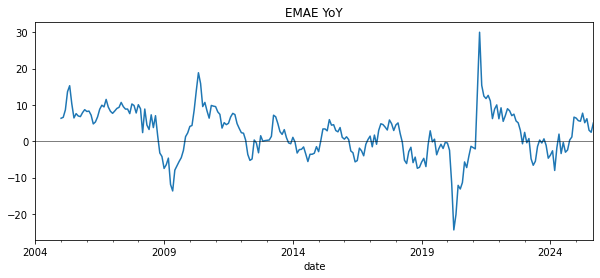

In [40]:
import matplotlib.pyplot as plt

df.set_index("date")["emae_yoy"].plot(figsize=(10,4))
plt.title("EMAE YoY")
plt.axhline(0, color="black", linewidth=0.5)
plt.show()


In [41]:
df.to_csv("../data/emae_yoy.csv", index=False)   # en EMAE